# Import library

In [1]:
# Before using MySQL Connector library in Jupyter Notebook, we need to install the mysql-connector-python library as command below
!pip install mysql-connector-python

In [63]:
# Import statements
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Connect to the database

In [44]:
# Create a connection to the database
conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='python', password='python')

# Load data from the database to dataframes by queries and do the Visualization

### Question 1: Retrieve the quantity of items sold by each department then sort by the department name. Load the result to df_department dataframe

In [60]:
df_department = pd.read_sql("SELECT DISTINCT department_name AS 'Department_Name', SUM(quantity_sold) AS 'Total_Items_Sold'\
                             FROM order_line ol\
                                INNER JOIN product p ON ol.product_id = p.product_id\
                                INNER JOIN department d on p.department_id = d.department_id\
                             GROUP BY department_name\
                             ORDER BY department_name", conn)

# Print out the dataframe to review
df_department

,Department_Name,Total_Items_Sold
0,Apparel,2336.0
1,Book Shop,12.0
2,Discs Shop,285.0
3,Fan Shop,2406.0
4,Fitness,244.0
5,Footwear,932.0
6,Golf,2355.0
7,Health and Beauty,64.0
8,Outdoors,812.0
9,Pet Shop,54.0


### Question 2: Bar chart to show all departments and the number of items each of them sold

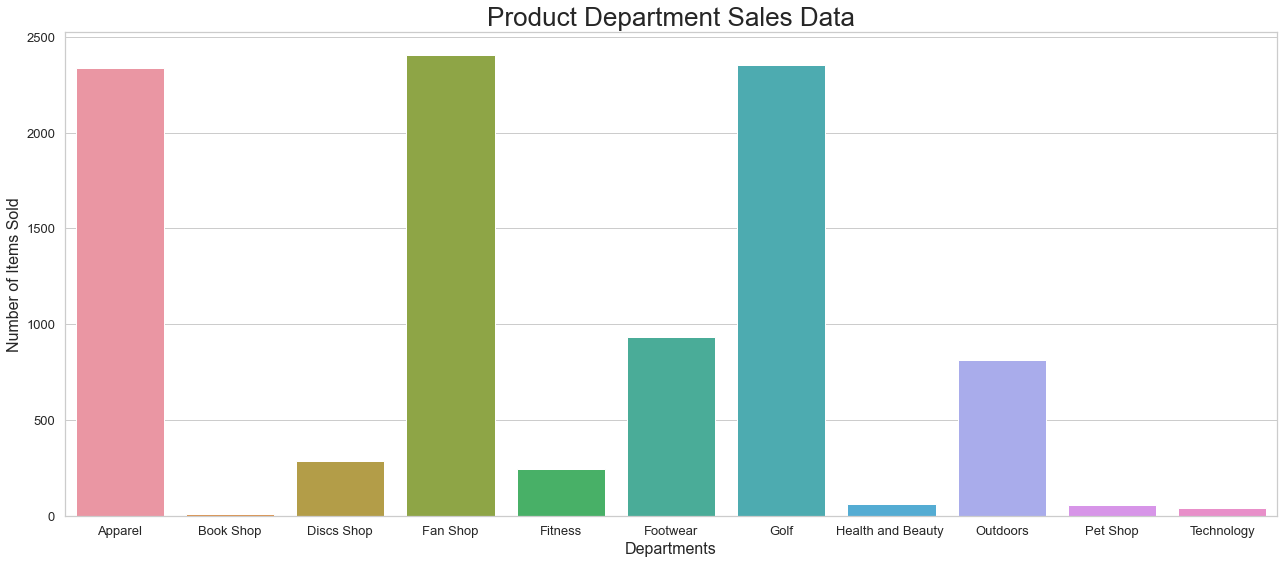

In [70]:
plt.figure(figsize=(18,8))
sns.set_theme(style="whitegrid")
visual_dept = sns.barplot(x="Department_Name",y="Total_Items_Sold", data=df_department)
visual_dept.axes.set_title("Product Department Sales Data",fontsize=26)
visual_dept.set_xlabel("Departments",fontsize=16)
visual_dept.set_ylabel("Number of Items Sold",fontsize=16)
visual_dept.tick_params(labelsize=13)
plt.show()

### Observation from the Number of items sold by department Bar chart above

- The most items sold are in three departments: **Apparel, Fan Shop and Golf**.
- The least items sold are in three departments: **Health and Beauty, Pet Shop, Technology and Book Shop**.
- The **Fan Shop** department has the highest sold item.
- The **Book Shop** department has the lowest sold item.
- Really low items sold in **Book Shop, Technology, Health and Beauty and Pet Shop**, the Management of Terpbuy may think of removing those items from the list of product.
- The best selling categories are those that include some kind of wearable items, like the **Apparel, Fan Shop and Golf**.

### Question 3: Retrieve the quantity of items sold by each department then sort by the department name. Load the result to df_department dataframe

In [68]:
df_year_order = pd.read_sql("SELECT YEAR(o.order_date) AS 'Year', COUNT(o.order_id) AS 'Total Orders'\
                             FROM orders o\
                             GROUP BY YEAR(o.order_date)", conn, index_col=['Year'])

# Print out the dataframe to review
df_year_order

,Total Orders
Year,
2018,585
2019,708
2020,497
2021,362


### Question 4: Line Graph to show all years and the number of orders placed during each year

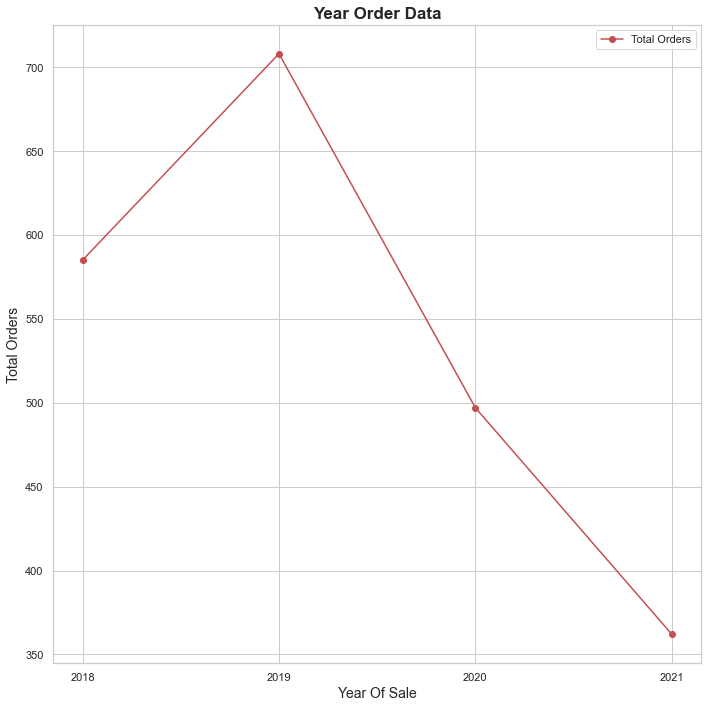

In [69]:
# Prepare chart parameter
df_year_order.plot(y='Total Orders', color='r', marker='o');

plt.title('Year Order Data', fontsize=17, fontweight='bold')
plt.xlabel('Year Of Sale', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)

# Specify x-axis labels
x_range = df_year_order.index

# Add x-axis values to plot
plt.xticks(ticks=df_year_order.index, labels=x_range)

# Display the grid
plt.grid(True)

# Display the chart
plt.show()

### Observation from the Number of orders placed each year

- The highest number of orders placed is in **2019**. 
- There is a growth of orders placed from **2018** to **2019**. But due to the Covid 19 pandemic, the number of orders has dropped very quickly in **2020**.
- The year **2021** is shaping up to be a record year, with first month sales almost as much as all of **2020**.

# Close the database connection 

In [37]:
conn.close()